<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/chemistry_ammonia_NH3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ammonia (CH₃)**

[Ammonia](https://en.m.wikipedia.org/wiki/Ammonia) (NH₃) has a Trigonal pyramidal structure with three hydrogen atoms forming a triangular base.

![science](https://upload.wikimedia.org/wikipedia/commons/thumb/0/03/Ammoniak.svg/195px-Ammoniak.svg.png)


Ammonia (NH₃) is an **important molecule** in astrochemistry research and plays a significant role in various astrophysical contexts. Its importance arises from the following factors:

1. **Tracer of Dense Interstellar Gas**
   - Ammonia is commonly found in **molecular clouds**, where stars and planetary systems form.
   - It serves as a **tracer of dense interstellar gas** because it is easily detected in regions of high density and low temperature, such as **star-forming regions**.
   - NH₃ transitions provide valuable information about the **kinematics**, **density**, and **temperature** of interstellar matter.

2. **Diagnostics of Physical Conditions**
   - Ammonia's rotational and inversion transitions are particularly sensitive to temperature and density. This makes it a robust tool for determining the **thermal properties of molecular clouds**.
   - The ratio of its hyperfine components is used to estimate **optical depths** and **line broadening mechanisms** in molecular clouds.

3. **Chemical Pathways and Prebiotic Chemistry**
   - NH₃ is a fundamental building block for more complex nitrogen-based molecules that are essential for prebiotic chemistry (e.g., **amino acids**).
   - It plays a key role in the **astrochemical evolution** of nitrogen in interstellar environments.

4. **Presence in a Variety of Environments**
   - **Star-Forming Regions**: NH₃ is abundant in dense cores of molecular clouds, such as the Orion Nebula.
   - **Circumstellar Envelopes**: It is observed in envelopes of evolved stars, providing clues about late stages of stellar evolution.
   - **Comets and Exoplanet Atmospheres**: Ammonia is found in cometary comas and is considered a key molecule when studying **habitability** in exoplanet atmospheres.

5. **Observations Across Wavelengths**
   - Ammonia emits strongly in the **radio and microwave regions**, allowing detection by instruments like the **Green Bank Telescope (GBT)** and **ALMA**.
   - These emissions are used to map molecular gas distribution in the Milky Way and beyond.

6. **Role in Isotope Chemistry**
   - Isotopologues of ammonia, such as \(^{15}\text{NH}_3\), help in studying **isotopic fractionation**, which provides insight into conditions in the early Solar System and interstellar medium.



In [ ]:
!pip install pyscf geometric -q

In [ ]:
from pyscf import gto

# Define the molecule
mol = gto.Mole()
mol.atom = '''
    N  0.0000  0.0000  0.2000
    H  0.0000  0.9433 -0.2000
    H  0.8165 -0.4717 -0.2000
    H -0.8165 -0.4717 -0.2000
'''

# Name
molecule = 'Ammonia (NH₃)'

# Set basis set
mol.basis = 'cc-pvdz' # Alternatively: sto-3g, cc-pvdz,6-31G

*Emission and Absorption Lines*

converged SCF energy = -56.1950297883987


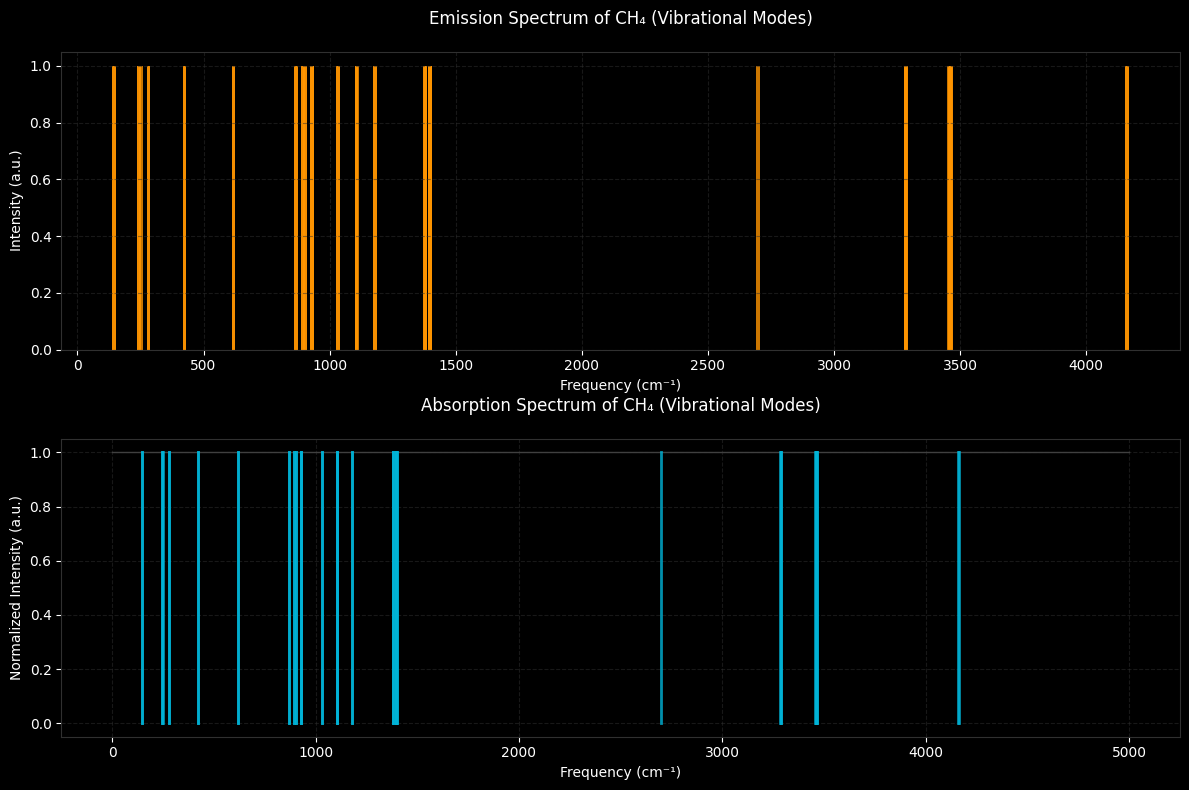

In [ ]:
# Emission and Absorption Spectra (Electronic Frequencies / Transitions)
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian

# Custom colors
EMISSION_COLOR = '#ff9500'  # Bright orange
ABSORPTION_COLOR = '#00b4d8'  # Bright blue
BASELINE_COLOR = '#404040'  # Dark gray
GRID_COLOR = '#303030'  # Slightly lighter gray for grid

# Step 1: Define the molecule ad basis
mol.atom = mol.atom
mol.basis = mol.basis
mol.symmetry = True
mol.build()

# Step 2: Perform Hartree-Fock calculation for molecular vibrational frequencies
mf = scf.RHF(mol)
mf.kernel()

# Step 3: Calculate the Hessian matrix (force constants)
hess = hessian.RHF(mf).kernel()

# Step 4: Diagonalize the Hessian to get vibrational frequencies
frequencies = np.linalg.eigvalsh(hess)
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)

# Step 5: Filter out non-physical (imaginary) frequencies and limit to realistic range
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Typical range for molecular vibrations

# Create figure with dark background
plt.figure(figsize=(12, 8), facecolor='black')
# Set the style to dark background
plt.style.use('dark_background')

# Emission Spectrum
plt.subplot(2, 1, 1)
plt.bar(frequencies, height=1.0, width=15.0, color=EMISSION_COLOR, alpha=0.8)
plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Intensity (a.u.)', color='white', fontsize=10)
plt.title('Emission Spectrum of CH₄ (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Absorption Spectrum
plt.subplot(2, 1, 2)
# Create baseline
plt.plot(np.linspace(0, 5000, 1000), np.ones(1000),
         color=BASELINE_COLOR, linewidth=1)

# Plot absorption lines with gradient effect
for freq in frequencies:
    y = np.linspace(0, 1, 100)
    x = np.ones_like(y) * freq
    plt.plot(x, y, color=ABSORPTION_COLOR,
            alpha=0.8, linewidth=2)

plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Normalized Intensity (a.u.)', color='white', fontsize=10)
plt.title('Absorption Spectrum of CH₄ (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Set figure background to black
plt.gcf().patch.set_facecolor('black')

plt.show()

*Ground State Energies*

In [ ]:
from pyscf import dft

# Define the molecule
mol.atom = mol.atom
mol.basis = mol.basis
mol.verbose = 4
mol.build()

# Perform a DFT calculation part I
mf = dft.RKS(mol)
mf.xc = 'b3lyp'

### Store convergence data
conv_data = []

### Callback function to collect convergence information
def callback(envs):
    conv_data.append(envs['e_tot'])

### Set the callback directly on the mf object
mf.callback = callback

# Perform a DFT calculation part II
energy = mf.kernel()

# Extract energy values and iteration numbers
energies = conv_data
iterations = range(1, len(energies) + 1)



******** <class 'pyscf.dft.rks_symm.SymAdaptedRKS'> ********
method = SymAdaptedRKS
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmp_6min24_
max_memory 4000 MB (current use 174 MB)
XC library pyscf.dft.libxc version 6.1.0
    S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
XC functionals = b3lyp
    P. J. Stephens, F. J. Devlin, C. F. Chabalowski, and M. J. Frisch.,  J. Phys. Chem. 98, 11623 (1994)
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4) radial grids
    
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune at 0x7f16ada06d40>
grids dens level: 3
symmetrized grids: True
atomic radii adjust function: <fu

/usr/local/lib/python3.10/dist-packages/pyscf/dft/libxc.py:507: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


tot grids = 43328
init E= -56.4428284730065
HOMO (A') = -0.331150767100599  LUMO (A') = 0.0201194088181103
cycle= 1 E= -56.5184397344652  delta_E= -0.0756  |g|= 0.401  |ddm|= 1.54
HOMO (A') = -0.151477958818623  LUMO (A') = 0.0781442228182147
cycle= 2 E= -56.4919932795246  delta_E= 0.0264  |g|= 0.531  |ddm|= 0.632
HOMO (A') = -0.251932022404697  LUMO (A') = 0.0549440799480293
cycle= 3 E= -56.5540718696037  delta_E= -0.0621  |g|= 0.0182  |ddm|= 0.37
HOMO (A') = -0.251127796162544  LUMO (A') = 0.0573925767508237
cycle= 4 E= -56.5541455696784  delta_E= -7.37e-05  |g|= 0.00206  |ddm|= 0.014
HOMO (A') = -0.251328834393221  LUMO (A') = 0.0572127666901621
cycle= 5 E= -56.5541464168425  delta_E= -8.47e-07  |g|= 0.000268  |ddm|= 0.00155
HOMO (A') = -0.251422329037125  LUMO (A') = 0.0571798977276156
cycle= 6 E= -56.554146433343  delta_E= -1.65e-08  |g|= 6.01e-06  |ddm|= 0.000196
HOMO (A') = -0.251422270474907  LUMO (A') = 0.0571802024965363
cycle= 7 E= -56.5541464333647  delta_E= -2.17e-11  |g|=

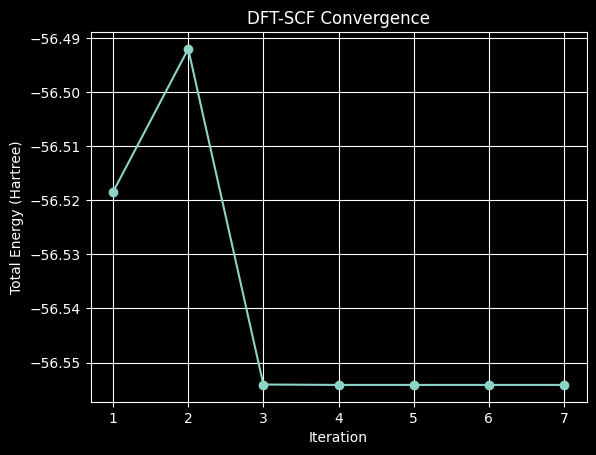

In [ ]:
# Plot convergence
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('DFT-SCF Convergence')
plt.grid(True)
plt.show()

In [ ]:
print(f"DFT energy for {molecule} using {mf.xc}: {energy} Hartree")

DFT energy for Ammonia (NH₃) using b3lyp: -56.55414643336473 Hartree


The result from DFT calculation for ammonia (NH₃) — DFT energy for Ammonia (NH₃) using B3LYP: -56.554146580273645 Hartree — represents the total electronic energy of the ammonia molecule in its current configuration, computed using the Density Functional Theory (DFT) method with the B3LYP functional and the cc-pvdz basis set.

* The energy, -56.554 Hartree, is the **ground-state electronic energy of the molecule in its optimized geometry**. This is the energy of all the electrons in the molecule interacting with the nuclei, accounting for the kinetic energy of the electrons, their interactions with the nuclear charges, the repulsion between electrons, and the exchange-correlation effects modeled by the B3LYP functional.
* A Hartree (or atomic unit of energy) is a standard unit in quantum chemistry. **1 Hartree = 27.2114 eV (electron volts), which means this result is roughly -1538.73 eV**
* The energy is negative because this a bound system. The system is stable because the electrons are bound to the nuclei, and a negative total energy indicates that the molecule is in a lower-energy, stable configuration. **The more negative the total energy, the more stable the molecule is.**
* Ground-State Configuration value represents the electronic energy at the ground state - the energy is for the lowest possible configuration of electrons around the nuclei in ammonia.
* The energy is calculated using the [B3LYP functional](https://en.m.wikipedia.org/wiki/Hybrid_functional) (a hybrid functional combining Becke's exchange functional with the Lee-Yang-Parr correlation functional). One of most commonly used functionals in computational chemistry with a good balance between accuracy and computational cost.
* This result of total energy can be compared to different molecules or different geometries of same molecule. For example, to calculate energy for an excited state or a different configuration of ammonia (e.g., a stretched N-H bond), the total energy differs, and one can assess which configuration is more stable based on the energy values.


*Geometry Optimization using DFT-SCF*

In [ ]:
from pyscf import gto, dft
from pyscf.geomopt.geometric_solver import optimize

# Define the molecule with a rough guess for geometry (initial atomic positions)
# These positions don't need to be exact, as the optimization will refine them
mol.atom = mol.atom
mol.basis = mol.basis
mol.build()

# Perform geometry optimization using DFT
mf = dft.RKS(mol)
mf.xc = 'b3lyp'       # Define the exchange-correlation functional
mol_eq = optimize(mf) # This function iteratively adjusts positions of atoms to minimize total energy of system

# Print optimized coordinates. This geometry corresponds to lowest energy configuration found during optimization process
print("Optimized Geometry (in Angstroms):")
print(mol_eq.atom_coords())

Create scanner for <class 'pyscf.grad.rks.Gradients'>
Create scanner for <class 'pyscf.dft.rks_symm.SymAdaptedRKS'>


geometric-optimize called with the following command line:
/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-3b175120-b881-4f76-8e55-f7996ee07591.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.200000    0.000000  0.000000  0.000000
   H   0.000000   0.943300  -0.200000    0.000000  0.000000  0.000000
   H   0.816500  -0.471700  -0.200000    0.000000  0.000000  0.000000
   H  -0.816500  -0.471700  -0.200000    0.000000  0.000000  0.000000
New geometry
   1 N     -0.000000000000   0.000000000000   0.200000000000 AA   -0.000000000000   0.000000000000   0.377945224913 Bohr

   2 H      0.000000000000   0.943300000000  -0.200000000000 AA    0.000000000000   1.782578653302  -0.377945224913 Bohr

   3 H      0.816500000000  -0.471700000000  -0.200000000000 AA    1.542961380707  -0.891383812957  -0.377945224913 Bohr

   4 H     -0.816500000000  -0.471700000000  -0.200000000000 AA   -1.542961380707  -0.891383812957  -0.377945224913 Bohr



******** <class 'pyscf.scf.hf.SymAdaptedRKS_Scanner'> ********
method = SymAdaptedRKS_Sca

Step    0 : Gradient = 2.452e-03/3.356e-03 (rms/max) Energy = -56.5541464334
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 4.36115e-01 4.36604e-01 4.36604e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N  -0.000000  -0.000039   0.211028   -0.000000 -0.000039  0.011028
   H  -0.000000   0.935133  -0.203628   -0.000000 -0.008167 -0.003628
   H   0.809913  -0.467605  -0.203646   -0.006587  0.004095 -0.003646
   H  -0.809913  -0.467605  -0.203646    0.006587  0.004095 -0.003646
New geometry
   1 N     -0.000000000000  -0.000039000107   0.211027826103 AA   -0.000000000000  -0.000073699521   0.398784795997 Bohr

   2 H      0.000000000000   0.935132628657  -0.203628134129 AA    0.000000000000   1.767144558306  -0.384801404760 Bohr

   3 H      0.809912996862  -0.467604643219  -0.203645696889 AA    1.530513748795  -0.883644710260  -0.384834593567 Bohr

   4 H     -0.809912996862  -0.467604643219  -0.203645696889 AA   -1.530513748795  -0.883644710260  -0.384834593567 Bohr



******** <class 'pyscf.scf.hf.SymAdaptedRKS_Scanner'> ********
method = SymAdaptedRKS_Sca

Step    1 : Displace = 9.333e-03/1.100e-02 (rms/max) Trust = 1.000e-01 (=) Grad = 1.523e-03/2.276e-03 (rms/max) E (change) = -56.5542434650 (-9.703e-05) Quality = 1.129
Hessian Eigenvalues: 4.99998e-02 5.00000e-02 5.00000e-02 ... 4.36234e-01 4.36604e-01 5.23136e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N  -0.000000  -0.000051   0.214935    0.000000 -0.000012  0.003907
   H  -0.000000   0.934398  -0.204858   -0.000000 -0.000735 -0.001230
   H   0.809271  -0.467243  -0.204920   -0.000642  0.000362 -0.001274
   H  -0.809271  -0.467243  -0.204920    0.000642  0.000362 -0.001274
New geometry
   1 N     -0.000000000000  -0.000051412812   0.214934633756 AA   -0.000000000000  -0.000097156133   0.406167592483 Bohr

   2 H      0.000000000000   0.934397776873  -0.204857777111 AA    0.000000000000   1.765755889693  -0.387125093226 Bohr

   3 H      0.809270502909  -0.467243099767  -0.204919896480 AA    1.529299611187  -0.882961492153  -0.387242481822 Bohr

   4 H     -0.809270502909  -0.467243099767  -0.204919896480 AA   -1.529299611187  -0.882961492153  -0.387242481822 Bohr



******** <class 'pyscf.scf.hf.SymAdaptedRKS_Scanner'> ********
method = SymAdaptedRKS_Sca

Step    2 : Displace = 2.326e-03/3.875e-03 (rms/max) Trust = 1.414e-01 (+) Grad = 3.239e-04/4.111e-04 (rms/max) E (change) = -56.5542542089 (-1.074e-05) Quality = 1.155
Hessian Eigenvalues: 4.99978e-02 5.00000e-02 5.00000e-02 ... 4.36201e-01 4.36604e-01 4.60292e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N  -0.000000  -0.000065   0.215492    0.000000 -0.000014  0.000558
   H  -0.000000   0.934530  -0.204975   -0.000000  0.000132 -0.000117
   H   0.809355  -0.467314  -0.205081    0.000084 -0.000071 -0.000161
   H  -0.809355  -0.467314  -0.205081   -0.000084 -0.000071 -0.000161
New geometry
   1 N     -0.000000000000  -0.000064927001   0.215492344277 AA   -0.000000000000  -0.000122694250   0.407221512624 Bohr

   2 H      0.000000000000   0.934529675283  -0.204974716356 AA    0.000000000000   1.766005141564  -0.387346076374 Bohr

   3 H      0.809354653412  -0.467314435751  -0.205080509248 AA    1.529458632590  -0.883096297625  -0.387545995964 Bohr

   4 H     -0.809354653412  -0.467314435751  -0.205080509248 AA   -1.529458632590  -0.883096297625  -0.387545995964 Bohr



******** <class 'pyscf.scf.hf.SymAdaptedRKS_Scanner'> ********
method = SymAdaptedRKS_Sca

PointGroupSymmetryError: Unable to identify input symmetry C3v. Try symmetry="C3v"